# <center><strong> CREDIT CARD FRAUD DETECTION </strong></center>

###### **By Mohamed Jamyl**

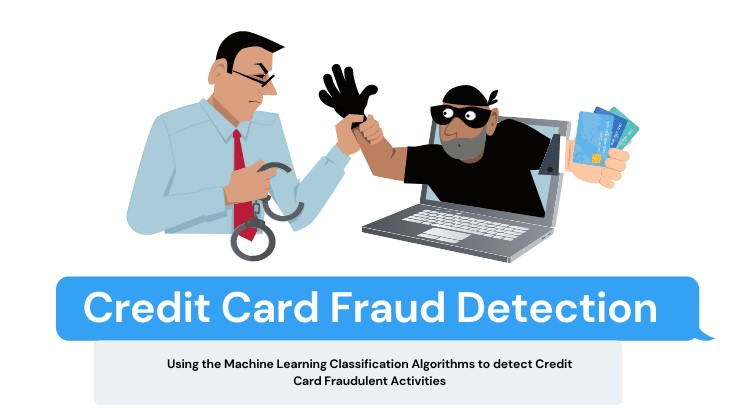

In [2]:
from IPython.display import Image
Image(filename='image.png')

## <center><strong> Project Overview </strong></center>



### Credit card fraud is an inclusive term for fraud committed using a payment card, such as a credit card or debit card. The purpose may be to obtain  goods or services or to make payment to another account, which is controlled by a criminal

--------------------------------
------------------------------

## **Import Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

------------------------------
-----------------------------

## **Explore Data**

In [6]:
df =  pd.read_csv('creditcard.csv')

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.shape

(284807, 31)

In [10]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
df[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


[Text(0, 0.5, 'Time'), Text(0.5, 1.0, 'Box Plot On Time')]

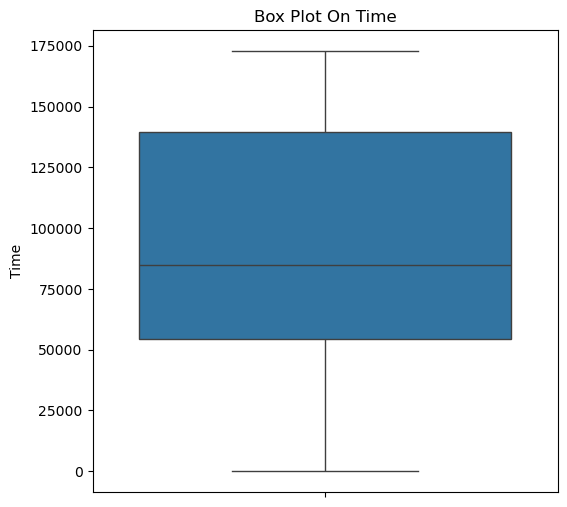

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(6, 6)
sns.boxplot(data=df,y="Time",orient="v",ax=axes)

axes.set(ylabel='Time',title="Box Plot On Time")

[Text(0, 0.5, 'Amount'), Text(0.5, 1.0, 'Box Plot On Amount')]

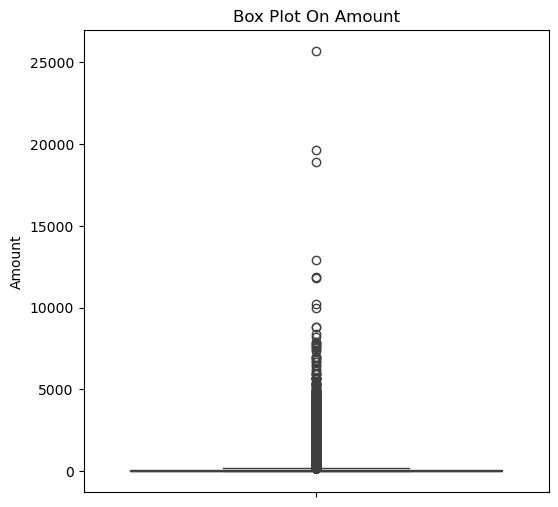

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(6, 6)
sns.boxplot(data=df,y="Amount",orient="v",ax=axes)

axes.set(ylabel='Amount',title="Box Plot On Amount")

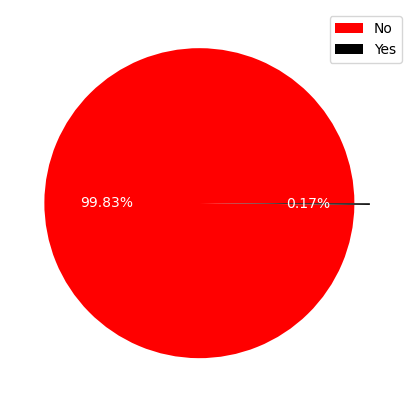

In [15]:
sex=["No",	"Yes"]
values	=df["Class"].value_counts()
color	=["#FF0000","#000000"]
 
plt.figure(figsize	=	(5,	7))
plt.pie(values,labels	=sex,colors	=color,	explode	=(0.1,	0),	textprops	={"color":"w"},	autopct	="%.2f%%")
plt.legend()
plt.show()

-------------------------------
------------------------------

## **Data Cleaning**

In [17]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [18]:
df.duplicated().sum()

1081

In [19]:
df = df.drop_duplicates()

In [20]:
df.shape

(283726, 31)

--------------------------------
-------------------------------

## **Creating model with Neural Network**

In [45]:
x =  df.drop('Class', axis =1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size=0.2, random_state=1234)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = Sequential([
      Dense(8,  activation = 'tanh'),
      Dense(128, activation = 'tanh'),
      Dense(64, activation = 'tanh'),
      Dense(1, activation = 'sigmoid'),
])

model.compile( optimizer=Adam(learning_rate=0.001),
               loss='binary_crossentropy',
               metrics=['accuracy'])

early_stopping = EarlyStopping( monitor = 'val_accuracy', 
                                patience = 2,
                                restore_best_weights=True )

history = model.fit(x_train, y_train, 
                    validation_data = (x_test, y_test), 
                    epochs=8,
                    batch_size=100,
                    verbose = 1,
                    callbacks=[early_stopping])

Epoch 1/8
2270/2270 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9847 - loss: 0.0506 - val_accuracy: 0.9993 - val_loss: 0.0040
Epoch 2/8
2270/2270 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9993 - val_loss: 0.0038
Epoch 3/8
2270/2270 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9995 - loss: 0.0029 - val_accuracy: 0.9993 - val_loss: 0.0036
Epoch 4/8
2270/2270 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9993 - val_loss: 0.0038
Epoch 5/8
2270/2270 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 0.9993 - val_loss: 0.0036


In [47]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss : {loss : .4f}, Accuracy: {accuracy: .4f}')

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9994 - loss: 0.0032
Loss :  0.0036, Accuracy:  0.9993


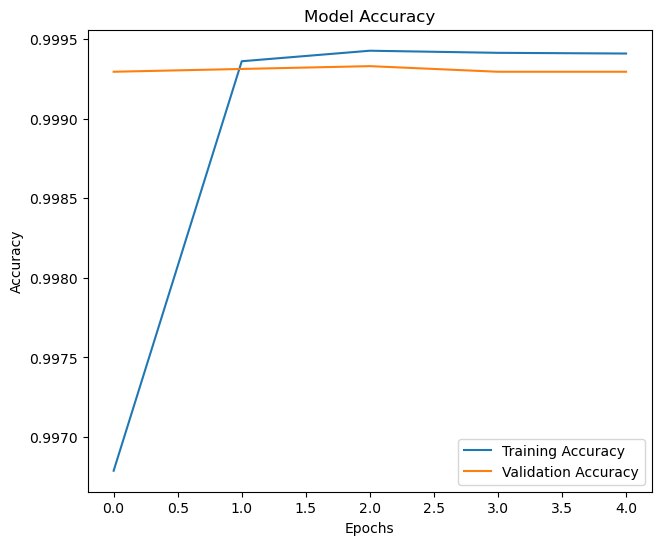

In [49]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)  
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

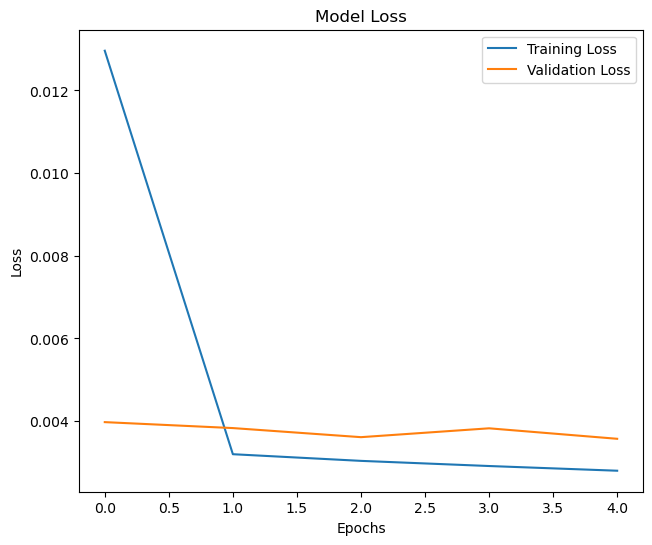

In [51]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 2)  
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

---------------------------------
--------------------------------

## **Testing Model**

In [53]:
predictions = model.predict(x_test)

predicted_classes = (predictions > 0.5).astype("int32")  

for i in range(30): 
    print(f"Sample {i + 1}: Predicted: {predicted_classes[i][0]}, Actual: {y_test.iloc[i]}")

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Sample 1: Predicted: 0, Actual: 0
Sample 2: Predicted: 0, Actual: 0
Sample 3: Predicted: 0, Actual: 0
Sample 4: Predicted: 0, Actual: 0
Sample 5: Predicted: 0, Actual: 0
Sample 6: Predicted: 0, Actual: 0
Sample 7: Predicted: 0, Actual: 0
Sample 8: Predicted: 0, Actual: 0
Sample 9: Predicted: 0, Actual: 0
Sample 10: Predicted: 0, Actual: 0
Sample 11: Predicted: 0, Actual: 0
Sample 12: Predicted: 0, Actual: 0
Sample 13: Predicted: 0, Actual: 0
Sample 14: Predicted: 0, Actual: 0
Sample 15: Predicted: 0, Actual: 0
Sample 16: Predicted: 0, Actual: 0
Sample 17: Predicted: 0, Actual: 0
Sample 18: Predicted: 0, Actual: 0
Sample 19: Predicted: 0, Actual: 0
Sample 20: Predicted: 0, Actual: 0
Sample 21: Predicted: 0, Actual: 0
Sample 22: Predicted: 0, Actual: 0
Sample 23: Predicted: 0, Actual: 0
Sample 24: Predicted: 0, Actual: 0
Sample 25: Predicted: 0, Actual: 0
Sample 26: Predicted: 0, Actual: 0
Sample 27: Predicted: 0, Actual: 0
Sample 28: Predicted:

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = confusion_matrix(y_test, predicted_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

report = classification_report(y_test, predicted_classes)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[56635    12]
 [   26    73]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56647
           1       0.86      0.74      0.79        99

    accuracy                           1.00     56746
   macro avg       0.93      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746



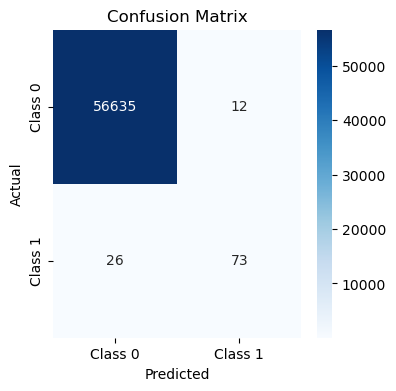

In [59]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()